<a href="https://colab.research.google.com/github/NayanaPradeep/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genre

12. description: The Summary description

# **SOLUTION**

##**IMPORTING THE LIBRARIES**

In [2]:
#importing necessary libraries for the dataset analysis
import numpy as np                                            # Computation on datasets
import pandas as pd                                           # Data processing, analysing and wrangling
import matplotlib.pyplot as plt                               # Data visualization --plotting
import matplotlib.image as mpimg                              # Data visualization --images
%matplotlib inline                                            
import seaborn as sns                                         # Data visualization --plotting
import collections

#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

##**MOUNT THE DRIVE**

In [3]:
#Mount the drive to load the dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**IMPORT THE DATASET**

In [4]:
# Read the dataset to start analyzing
file_path = '/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering - Nayana Pradeep/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df=pd.read_csv(file_path)

## **PRIMARY DATA CHECKS**

In [5]:
#Top 5 records of the dataset
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
#Bottom 5 records of the dataset
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
#Number of rows and columns of the dataset
netflix_df.shape

(7787, 12)

In [8]:
#Name of the columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
#Details of the columns of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##  **HANDLING NULLS AND DUPLICATES**

In [10]:
#Checking the number of duplicates in the dataset
len(netflix_df[netflix_df.duplicated( keep='first')])

0

In [11]:
#Find the number of columns with null value for each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#Display the number of unique values for each of the column
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [13]:
#Display the two types of netflix records
netflix_df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [14]:
#Display the unique ratings available in the dataset
netflix_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
#Check for duplicates
netflix_df.duplicated().sum()

0

In [16]:
#Copying the original dataset to a backup copy before making changes to the dataset
netflix_original = netflix_df.copy()

In [17]:
# Replacing the values where the director is null with appropriate strings
netflix_df["director"] = netflix_df["director"].fillna("Director Info Missing")
netflix_df["cast"] = netflix_df["cast"].fillna("Cast Info Missing")
netflix_df["country"] = netflix_df["country"].fillna("Country Info Missing")

In [18]:
#Find the number of columns with null value for each column after making above changes
netflix_df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [19]:
#Dropping the null value rows
netflix_df.dropna(axis=0,how='any',inplace = True)
netflix_df.reset_index(drop=True, inplace=True)
netflix_df.shape

(7770, 12)

## **EXPLORATORY DATA ANALYSIS**

In [20]:
#Type column count for each category
netflix_df["type"].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

Text(0.5, 1.0, 'Type')

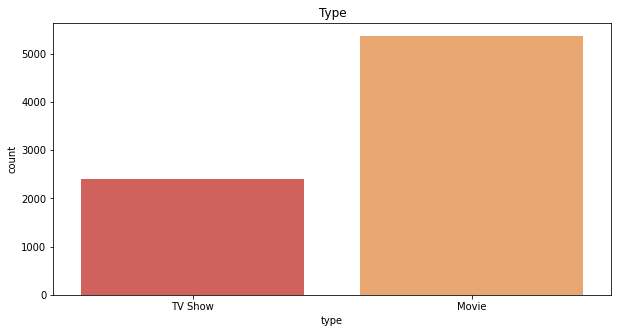

In [21]:
#Analysis on Type column
sns.set_palette("Spectral")
plt.figure(figsize=(10,5))
sns.countplot(netflix_df['type'])
plt.title('Type')

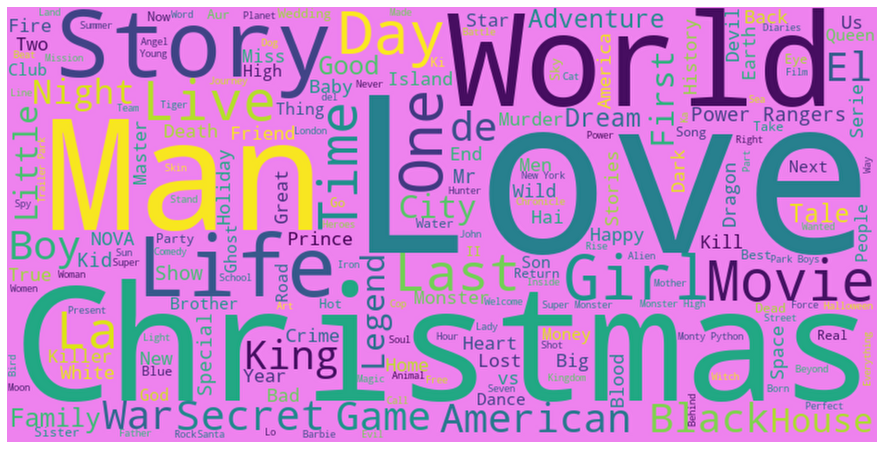

In [22]:
#Analysis on title column
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['title'])
stopwords = set(STOPWORDS)

# Generate a word cloud image with most used titles
title_cloud = WordCloud(stopwords=stopwords, background_color="violet",width=800, height=400).generate(title_words)
plt.imshow(title_cloud, interpolation='bessel')
plt.axis("off")
plt.show()

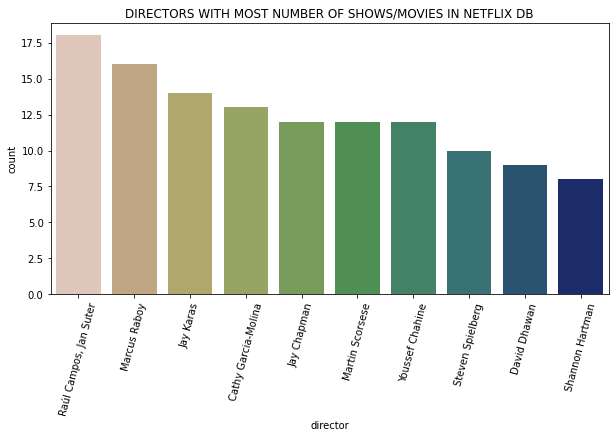

In [23]:
#analysis on director column
plt.figure(figsize = (10,5))

#excluding the missing information 
netflix_directors =netflix_df[netflix_df['director'] != 'Director Info Missing']
sns.countplot(x='director',data=netflix_directors,order=netflix_directors.director.value_counts().head(10).index,palette='gist_earth_r')
plt.title('DIRECTORS WITH MOST NUMBER OF SHOWS/MOVIES IN NETFLIX DB')
plt.xticks(rotation = 75)
plt.show()

In [24]:
#analysis on cast column
#excluding the missing information 
netflix_cast =netflix_df[netflix_df['cast'] != 'Cast Info Missing']
netflix_cast["cast"].value_counts()

David Attenborough                                                                                                                                                                                                                            18
Samuel West                                                                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                                                                    7
Craig Sechler                                                                                                                                                                                                                                  6
Michela Luci, Jamie Watson, Eric Pet

As we can see above, the cast details include the main actors of each movie or show.So each record can contain one or more actors. We have to put this information to another list to see which actor has the most number of shows/movies listed in this dataset

In [25]:
#Moving each entry to a new list
cast_list = list(netflix_cast['cast'])

#Moving the actor names as separate elements in the list 
cast_list_new =[x for xs in cast_list for x in xs.split(',')]

#Making a dictionary with the above list with the number of times the actors name appears in the dataset as the key
cast_list_count = collections.Counter(cast_list_new)
cast_list_count

Counter({'João Miguel': 1,
         ' Bianca Comparato': 2,
         ' Michel Gomes': 1,
         ' Rodolfo Valente': 1,
         ' Vaneza Oliveira': 1,
         ' Rafael Lozano': 1,
         ' Viviane Porto': 1,
         ' Mel Fronckowiak': 1,
         ' Sergio Mamberti': 1,
         ' Zezé Motta': 1,
         ' Celso Frateschi': 1,
         'Demián Bichir': 2,
         ' Héctor Bonilla': 1,
         ' Oscar Serrano': 1,
         ' Azalia Ortiz': 1,
         ' Octavio Michel': 1,
         ' Carmen Beato': 3,
         'Tedd Chan': 1,
         ' Stella Chung': 1,
         ' Henley Hii': 5,
         ' Lawrence Koh': 1,
         ' Tommy Kuan': 1,
         ' Josh Lai': 1,
         ' Mark Lee': 2,
         ' Susan Leong': 2,
         ' Benjamin Lim': 1,
         'Elijah Wood': 3,
         ' John C. Reilly': 9,
         ' Jennifer Connelly': 1,
         ' Christopher Plummer': 8,
         ' Crispin Glover': 6,
         ' Martin Landau': 4,
         ' Fred Tatasciore': 17,
         ' Alan Opp

In [26]:
#Changing the dictionary to a dataframe
cast_list_count = pd.DataFrame.from_dict(cast_list_count, orient='index', columns=['count'])
cast_list_count

,count
João Miguel,1
Bianca Comparato,2
Michel Gomes,1
Rodolfo Valente,1
Vaneza Oliveira,1
...,...
Anita Shabdish,1
Chittaranjan Tripathy,1
Nasty C,1
Adriano Zumbo,1


In [27]:
#Top 20 entries
cast_list_count.nlargest(20,['count'])

,count
Anupam Kher,38
Takahiro Sakurai,28
Om Puri,27
Shah Rukh Khan,27
Boman Irani,25
Paresh Rawal,24
Andrea Libman,24
Yuki Kaji,23
Akshay Kumar,22
Vincent Tong,22


In [28]:
#Sorting the dataframe in the descending order
cast_list_count = cast_list_count.sort_values('count', ascending=False)
cast_list_count.reset_index(inplace=True)

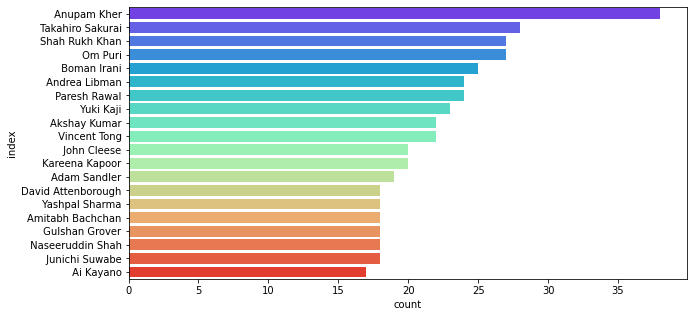

In [29]:
#Plottng a bargraph for the above analysis
plt.figure(figsize=(10,5))
sns.barplot(y="index", x="count", data=cast_list_count.nlargest(20,['count']),palette="rainbow")

In [30]:
#analysis on countries
countries_list = list(netflix_df['country'])
country_list =[x for xs in countries_list for x in xs.split(',')]
country_list = [i.strip() for i in country_list]
country_count = collections.Counter(country_list)

In [31]:
#Changing to dataframe
country_count = pd.DataFrame.from_dict(country_count, orient='index', columns=['count'])
country_count.reset_index(inplace=True)

In [32]:
#Renaming the columns for readability
country_count.rename(columns = {'index':'country'}, inplace = True)
country_count.reset_index(drop=True, inplace=True)

In [33]:
#Declaring two new columns for the count of tv shows and movies each
country_count["Number of TV Shows"] = ""
country_count["Number of Movies"] = ""

In [34]:
#Counting the number of shows and movies for each country
for i in range(len(country_count)):
  count_tv = 0
  count_movie = 0
  country_name = country_count.country[i]
  for j in range(len(netflix_df)):
    if((netflix_df['type'][j] == 'Movie') & (country_name in netflix_df['country'][j])):
      count_movie = count_movie + 1
    elif((netflix_df['type'][j] == 'TV Show') & (country_name in netflix_df['country'][j])):
      count_tv = count_tv + 1
  
  country_count["Number of TV Shows"][i] = count_tv
  country_count["Number of Movies"][i] = count_movie


In [35]:
#Top 10 records of the derived dataset
country_count.head(10)

,country,count,Number of TV Shows,Number of Movies
0,Brazil,88,29,59
1,Mexico,154,53,101
2,Singapore,39,21,18
3,United States,3288,860,2428
4,Turkey,108,28,80
5,Egypt,110,13,97
6,India,990,75,915
7,Poland,36,8,28
8,Thailand,65,22,43
9,Nigeria,76,8,68


In [36]:
#Sort the dataset to see the toppers
country_count=country_count.sort_values('count',ascending=False)
index_names = country_count[ country_count['country'] == 'Country Info Missing' ].index
country_count.drop(index_names, inplace = True)
country_count.reset_index(inplace=True)

In [37]:
#Top 20 countries
top_countries=country_count.head(10)
top_countries = top_countries[top_countries['country']!='Country Info Missing']
top_countries

,index,country,count,Number of TV Shows,Number of Movies
0,3,United States,3288,860,2428
1,6,India,990,75,915
2,13,United Kingdom,722,255,467
3,17,Canada,412,126,286
4,22,France,349,84,265
5,14,Japan,285,182,103
6,20,Spain,215,57,158
7,15,South Korea,212,157,55
8,26,Germany,199,44,160
9,1,Mexico,154,53,101


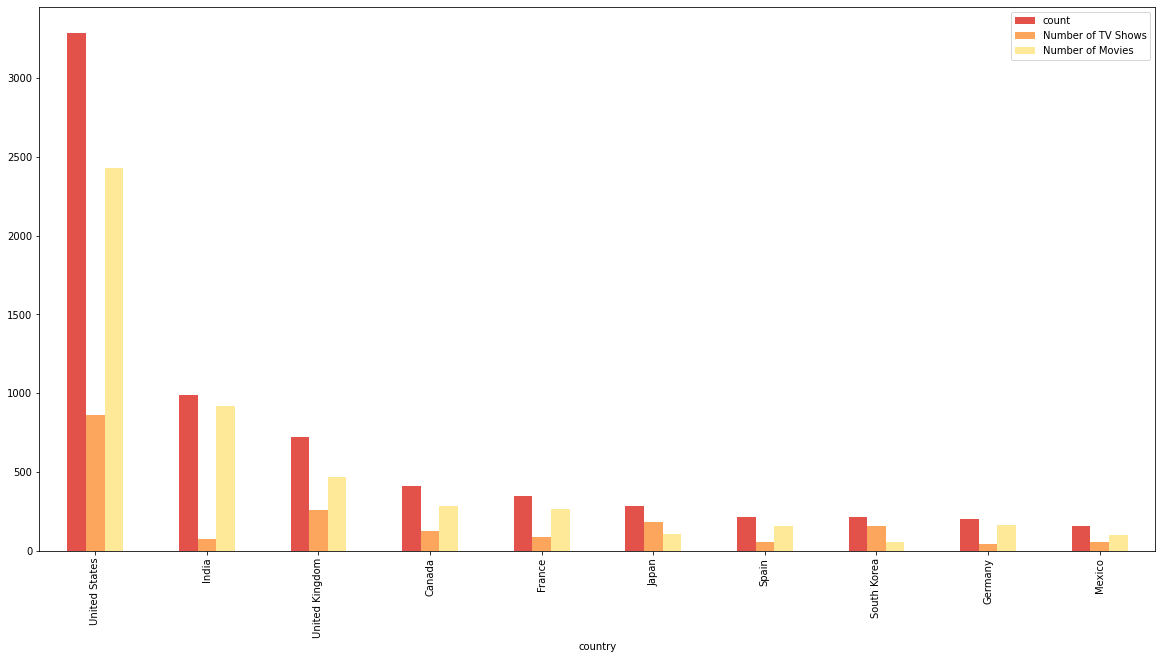

In [38]:
#Plotting a bargraph
top_countries.plot(x="country", y=['count','Number of TV Shows','Number of Movies'], kind="bar",figsize=(20,10))

In [39]:
#Analysis on release year
netflix_df["release_year"].value_counts()

2018    1120
2017    1010
2019     996
2016     881
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

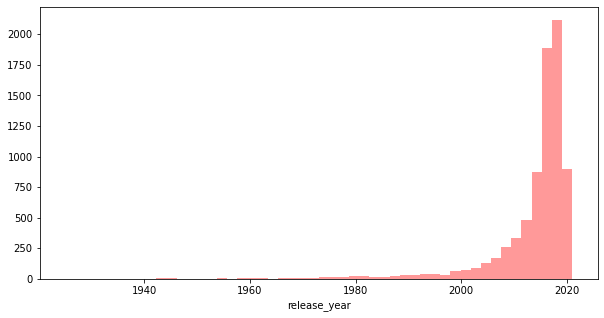

In [40]:
#overall year of release analysis
plt.figure(figsize=(10,5))
sns.distplot(netflix_df["release_year"],kde=False, color="red")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

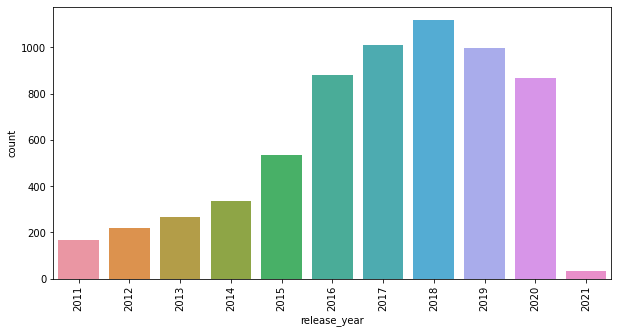

In [41]:
#Checking the trends from the year 2010
recent_years = netflix_df[netflix_df['release_year']>2010]

#overall year of release analysis
plt.figure(figsize=(10,5))
sns.countplot(recent_years["release_year"])
plt.xticks(rotation = 90)

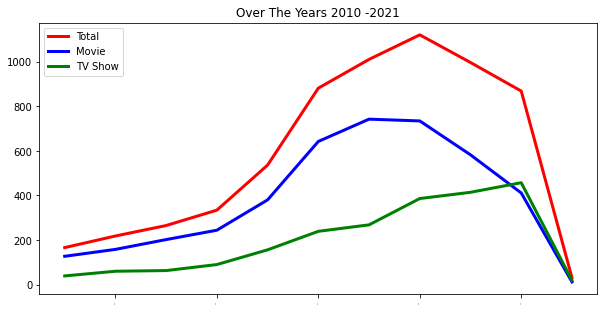

In [42]:
#Visualize the growth of netflix industry over the years

year_data = recent_years['release_year'].value_counts().sort_index().loc[:2021]
type_data = recent_years.groupby('release_year')['type'].value_counts().unstack().loc[:2021]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index,year_data, color = 'red', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=0)

ax.set_title('Over The Years 2010 -2021')

plt.xticks(rotation = 90)
plt.legend(loc='upper left')

Text(0.5, 1.0, 'RATING')

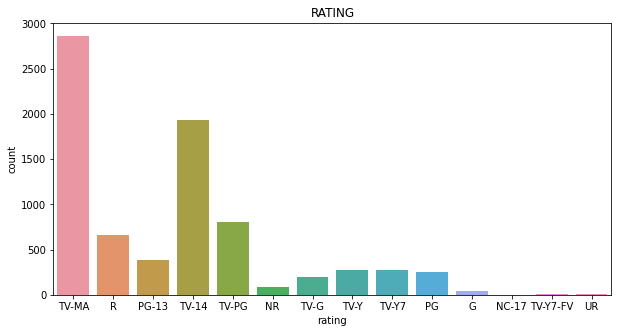

In [43]:
#Analysis on various ratings
plt.figure(figsize=(10,5))
sns.countplot(netflix_df['rating'])
plt.title('RATING')



*   TV-MA :- This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17
*   R :- Restricted; Under 17 requires accompanying parent or adult guardian
*  PG-13 :- Parents strongly cautioned; Some material may be inappropriate for children 
*  TV-14 :- This program may be unsuitable for children under 14 years of age
*  TV-PG :- This program contains material that parents may find unsuitable for younger children; Parental guidance is recommended
*  NR :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. 
*  TV-G :- This program is suitable for all ages
*   TV-Y :- This program is aimed at a very young audience, including children from ages 2–6
*   TV-Y7 :- This program is most appropriate for children age 7 and up.
*   PG :- Parental guidance suggested
*   G :- All ages admitted; General audiences.
*   NC-17 :- Adults Only; No One 17 and Under Admitted; Clearly adult; Children are not admitted
*   TV-Y7-FV :- Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category
*  UR :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. 


In [44]:
#Find the count of ratings
netflix_df["rating"].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

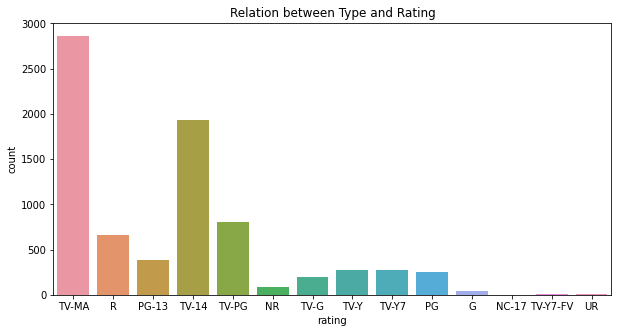

In [45]:
#Production type and Rating type
sns.set_palette("magma")
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=netflix_df)
plt.title('Relation between Type and Rating')
plt.show()

In [46]:
#Declaring two new columns for the count of tv shows and movies each
country_count["Units with TV-MA rating"] = ""
country_count["Units with R rating"] = ""
country_count["Units with PG-13 rating"] = ""
country_count["Units with TV-14 rating"] = ""
country_count["Units with TV-PG rating"] = ""
country_count["Units with NR rating"] = ""
country_count["Units with TV-G rating"] = ""
country_count["Units with TV-Y rating"] = ""
country_count["Units with TV-Y7 rating"] = ""
country_count["Units with PG rating"] = ""
country_count["Units with G rating"] = ""
country_count["Units with NC-17 rating"] = ""
country_count["Units with TV-Y7-FV rating"] = ""
country_count["Units with UR rating"] = ""

In [47]:
#Counting the number of shows and movies for each country
for i in range(len(country_count)):
  tv_ma_rat = 0
  tv_14_rat = 0
  tv_pg_rat = 0
  r_rat = 0
  pg_13_rat = 0
  tv_y_rat = 0
  tv_y7_rat = 0
  pg_rat = 0
  tv_g_rat = 0
  nr_rat = 0
  g_rat = 0
  tv_y7_fv_rat = 0
  ur_rat = 0
  nc_17_rat = 0
  
  country_name = country_count.country[i]
  for j in range(len(netflix_df)):
    if((netflix_df['rating'][j] == 'TV-MA') & (country_name in netflix_df['country'][j])):
      tv_ma_rat = tv_ma_rat + 1
    elif((netflix_df['rating'][j] == 'TV-14') & (country_name in netflix_df['country'][j])):
      tv_14_rat = tv_14_rat + 1
    elif((netflix_df['rating'][j] == 'TV-PG') & (country_name in netflix_df['country'][j])):
      tv_pg_rat = tv_pg_rat + 1
    elif((netflix_df['rating'][j] == 'R') & (country_name in netflix_df['country'][j])):
      r_rat = r_rat + 1
    elif((netflix_df['rating'][j] == 'PG-13') & (country_name in netflix_df['country'][j])):
      pg_13_rat = pg_13_rat + 1
    elif((netflix_df['rating'][j] == 'TV-Y') & (country_name in netflix_df['country'][j])):
      tv_y_rat = tv_y_rat + 1
    elif((netflix_df['rating'][j] == 'TV-Y7') & (country_name in netflix_df['country'][j])):
      tv_y7_rat = tv_y7_rat + 1
    elif((netflix_df['rating'][j] == 'PG') & (country_name in netflix_df['country'][j])):
      pg_rat = pg_rat + 1
    elif((netflix_df['rating'][j] == 'TV-G') & (country_name in netflix_df['country'][j])):
      tv_g_rat = tv_g_rat + 1
    elif((netflix_df['rating'][j] == 'NR') & (country_name in netflix_df['country'][j])):
      nr_rat = nr_rat + 1
    elif((netflix_df['rating'][j] == 'G') & (country_name in netflix_df['country'][j])):
      g_rat = g_rat + 1
    elif((netflix_df['rating'][j] == 'TV-Y7-FV') & (country_name in netflix_df['country'][j])):
      tv_y7_fv_rat = tv_y7_fv_rat + 1
    elif((netflix_df['rating'][j] == 'UR') & (country_name in netflix_df['country'][j])):
      ur_rat = ur_rat + 1
    elif((netflix_df['rating'][j] == 'NC-17') & (country_name in netflix_df['country'][j])):
      nc_17_rat = nc_17_rat + 1

  country_count["Units with TV-MA rating"][i] = tv_ma_rat
  country_count["Units with TV-14 rating"][i] = tv_14_rat
  country_count["Units with TV-PG rating"][i] = tv_pg_rat
  country_count["Units with R rating"][i] = r_rat
  country_count["Units with PG-13 rating"][i] = pg_13_rat
  country_count["Units with TV-Y rating"][i] = tv_y_rat
  country_count["Units with TV-Y7 rating"][i] = tv_y7_rat
  country_count["Units with PG rating"][i] = pg_rat
  country_count["Units with TV-G rating"][i] = tv_g_rat
  country_count["Units with NR rating"][i] = nr_rat
  country_count["Units with G rating"][i] = g_rat
  country_count["Units with TV-Y7-FV rating"][i] = tv_y7_fv_rat 
  country_count["Units with UR rating"][i] = ur_rat
  country_count["Units with NC-17 rating"][i] = nc_17_rat



In [48]:
country_count = country_count.drop(['index'], axis = 1)

In [49]:
country_count.head(10)

,country,count,Number of TV Shows,Number of Movies,Units with TV-MA rating,Units with R rating,Units with PG-13 rating,Units with TV-14 rating,Units with TV-PG rating,Units with NR rating,Units with TV-G rating,Units with TV-Y rating,Units with TV-Y7 rating,Units with PG rating,Units with G rating,Units with NC-17 rating,Units with TV-Y7-FV rating,Units with UR rating
0,United States,3288,860,2428,1033,539,340,462,287,42,84,115,137,207,37,1,2,2
1,India,990,75,915,246,5,9,542,142,8,10,7,14,5,0,0,1,1
2,United Kingdom,722,255,467,236,120,66,97,95,12,23,27,11,31,3,0,0,1
3,Canada,412,126,286,100,68,28,47,39,5,17,45,35,23,2,1,1,1
4,France,349,84,265,152,49,22,43,11,4,6,18,21,18,2,1,0,2
5,Japan,285,182,103,95,6,7,84,47,0,2,1,32,10,1,0,0,0
6,Spain,215,57,158,156,11,5,18,9,1,1,5,1,5,2,1,0,0
7,South Korea,212,157,55,88,2,1,73,18,4,1,8,14,2,1,0,0,0
8,Germany,199,44,160,74,36,25,24,16,2,8,3,6,8,2,0,0,0
9,Mexico,154,53,101,93,12,3,21,11,4,3,0,5,2,0,0,0,0


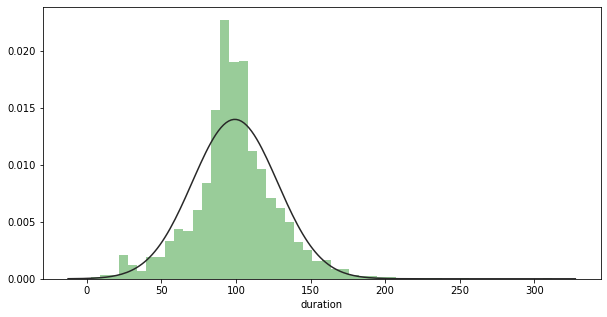

In [50]:
#analysis on the duration of the movies
duration_movie = netflix_df[netflix_df["type"] == "Movie"]['duration'].str.rstrip('min').astype('int')
plt.figure(figsize= (10, 5))
sns.distplot(duration_movie, fit = norm, kde = False, color = 'green')
plt.show()

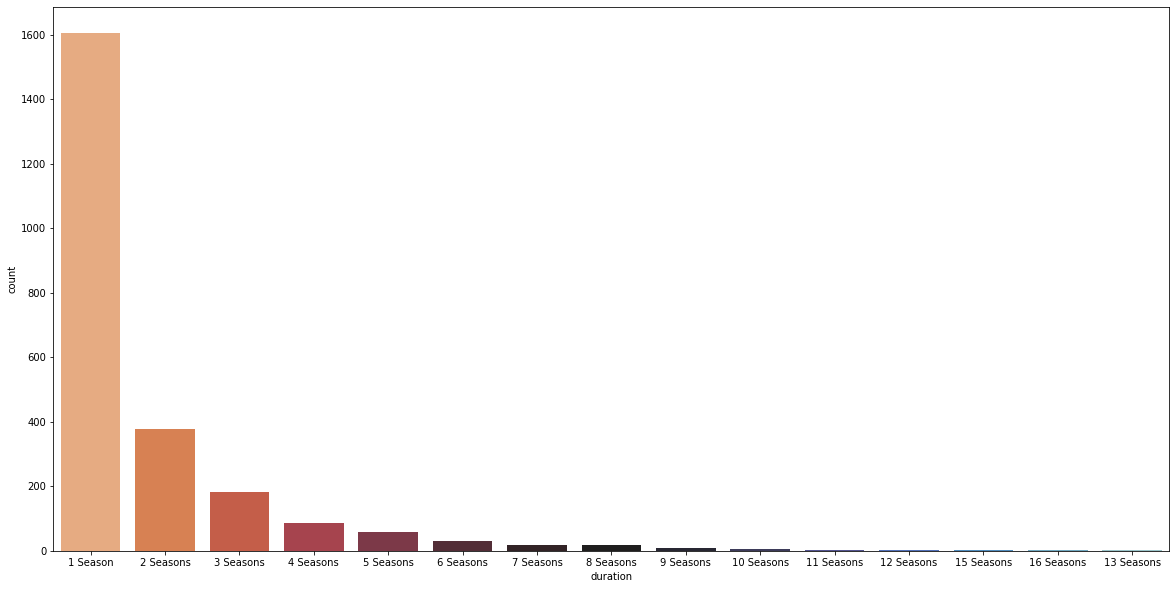

In [51]:
#analysis on the duration of the TV Shows
duration_show = netflix_df[netflix_df["type"] == "TV Show"]['duration']
total = float(len(duration_show))
plt.figure(figsize= (20, 10))
ax = sns.countplot(x = duration_show, palette = 'icefire_r', order = duration_show.value_counts().index)
plt.show()

In [52]:
netflix_df['listed_in'].value_counts()

Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
Action & Adventure, Classic Movies, International Movies             1
Independent Movies                                                   1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy      1
Comedies, Cult Movies, Sports Movies                                 1
Dramas, Music & Musicals, Sci-Fi & Fantasy                           1
Name: listed_in, Length: 491, dtype: int64

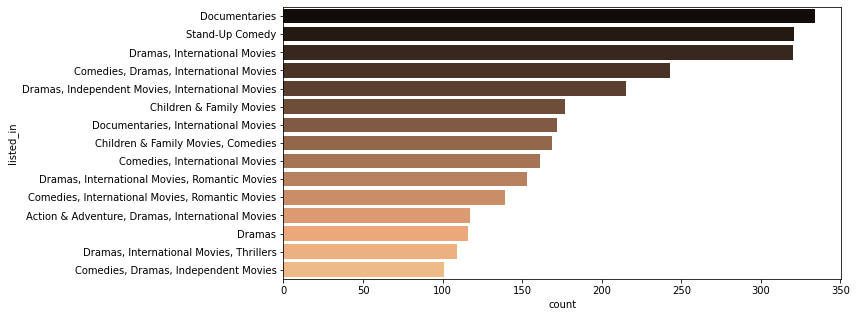

In [53]:
plt.figure(figsize = (10, 5))
sns.countplot(data = netflix_df, y = 'listed_in', palette = 'copper', order = netflix_df[netflix_df['type'] == 'Movie']['listed_in'].value_counts().index[: 15])
plt.show()

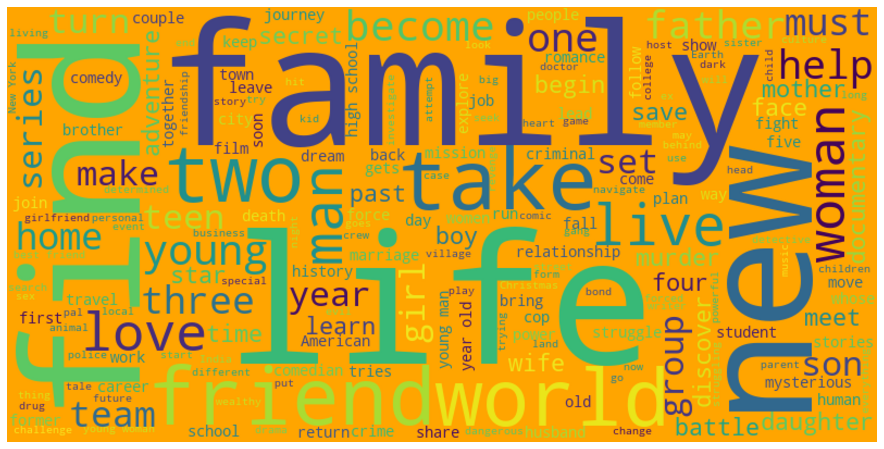

In [54]:
#Analysis on description column
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['description'])
stopwords = set(STOPWORDS)
# Generate a word cloud image
title_cloud = WordCloud(stopwords=stopwords, background_color="orange",width=800, height=400).generate(title_words)
plt.imshow(title_cloud, interpolation='mitchell')
plt.axis("off")
plt.show()

In [61]:
import re
def genres_by_country(c):
    genres = []
    genres_list = []
    for i in netflix_df[netflix_df.country.str.contains(c, na=False)]['listed_in']:
        genre = re.split(r', \s*', i)
        genres.append(genre)
    
    for sublist in genres:
      for item in sublist:
        genres_list.append(item)
    
    
    return genres_list

pd.DataFrame(genres_by_country('India'))[0].value_counts()

International Movies            828
Dramas                          626
Comedies                        308
Independent Movies              145
Action & Adventure              134
Romantic Movies                 113
Music & Musicals                 97
Thrillers                        88
International TV Shows           60
Horror Movies                    34
Documentaries                    26
TV Comedies                      25
TV Dramas                        25
Children & Family Movies         22
Sports Movies                    18
Kids' TV                         12
Sci-Fi & Fantasy                 12
Classic Movies                   11
Romantic TV Shows                10
Crime TV Shows                    9
TV Horror                         7
Docuseries                        7
Stand-Up Comedy                   6
Cult Movies                       5
TV Action & Adventure             5
Faith & Spirituality              4
Reality TV                        4
Stand-Up Comedy & Talk Shows

In [68]:

india_netflix = pd.DataFrame(genres_by_country('India'))[0].value_counts()

type(india_netflix)

pandas.core.series.Series

In [67]:
india_netflix

International Movies            828
Dramas                          626
Comedies                        308
Independent Movies              145
Action & Adventure              134
Romantic Movies                 113
Music & Musicals                 97
Thrillers                        88
International TV Shows           60
Horror Movies                    34
Documentaries                    26
TV Comedies                      25
TV Dramas                        25
Children & Family Movies         22
Sports Movies                    18
Kids' TV                         12
Sci-Fi & Fantasy                 12
Classic Movies                   11
Romantic TV Shows                10
Crime TV Shows                    9
TV Horror                         7
Docuseries                        7
Stand-Up Comedy                   6
Cult Movies                       5
TV Action & Adventure             5
Faith & Spirituality              4
Reality TV                        4
Stand-Up Comedy & Talk Shows

In [ ]:


sns.countplot(data = india_netflix, y = 'listed_in', palette = 'copper', order = netflix_df[netflix_df['type'] == 'Movie']['listed_in'].value_counts().index[: 15])
plt.show()

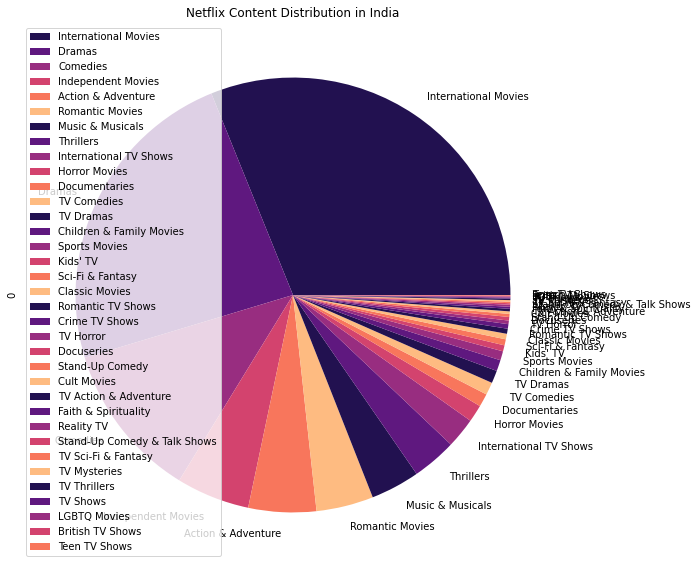

<Figure size 432x288 with 0 Axes>

In [82]:
plt.figure(figsize = (20, 10))
india_netflix.plot.pie(title="Netflix Content Distribution in India",legend = None)
plt.xlabel("")
plt.legend(loc='upper left', fontsize=10)
plt.show()
plt.tight_layout()

## New Section

In [83]:
final_netflix = netflix_original[['title','director','cast','listed_in','description']]
final_netflix.head()


,title,director,cast,listed_in,description
0,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",Dramas,A brilliant group of students become card-coun...


In [84]:
!pip install rake-nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


     |████████████████████████████████| 1.5 MB 6.8 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [85]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [86]:
rake = Rake()
final_netflix['director'] = final_netflix['director'].fillna(' ')
final_netflix['director'] = final_netflix['director'].astype(str)
final_netflix['cast'] = final_netflix['cast'].fillna(' ')
final_netflix['cast'] = final_netflix['cast'].astype(str)

In [87]:
final_netflix['key_phrases'] = ''
for index,row in final_netflix.iterrows():
    storyline = row['description']
    
    rake.extract_keywords_from_text(storyline)
    keyword_score = rake.get_word_degrees()
    
    genre = ''.join(row['listed_in'].split(',')).lower()
    director = ''.join(row['director'].replace(' ','').split(',')).lower()
    cast = ' '.join(row['cast'].replace(' ','').split(',')).lower()
    keyword_score = ' '.join(list(keyword_score.keys()))
    
    row['key_phrases'] = genre + ' ' + ' ' + director + ' ' + cast + ' ' + keyword_score

recommend = final_netflix[['title','key_phrases']]
recommend.head()

,title,key_phrases
0,3%,international tv shows tv dramas tv sci-fi & f...
1,7:19,dramas international movies jorgemichelgrau d...
2,23:59,horror movies international movies gilbertcha...
3,9,action & adventure independent movies sci-fi &...
4,21,dramas robertluketic jimsturgess kevinspacey ...


In [88]:
cv = CountVectorizer()
count_mat = cv.fit_transform(recommend['key_phrases'])
cosine_sim = cosine_similarity(count_mat,count_mat)
print(cosine_sim)

[[1.         0.06324555 0.05679618 ... 0.03535534 0.24806947 0.        ]
 [0.06324555 1.         0.10776318 ... 0.17888544 0.03922323 0.        ]
 [0.05679618 0.10776318 1.         ... 0.1204829  0.0352235  0.        ]
 ...
 [0.03535534 0.17888544 0.1204829  ... 1.         0.0438529  0.21081851]
 [0.24806947 0.03922323 0.0352235  ... 0.0438529  1.         0.        ]
 [0.         0.         0.         ... 0.21081851 0.         1.        ]]


In [89]:
indices = pd.Series(recommend['title'])
def recommend_movie(name):
    movie=[]
    idx = indices[indices == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    recommendation_5= sort_index.iloc[1:10]
    for i in recommendation_5.index:
        movie.append(indices[i])
    return movie